# Import Libraries 

In [2]:
import pandas as pd
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
df=pd.read_csv('Disaster_Data.csv')

# Data Visualization

In [5]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
#dimension
df.shape

(10876, 5)

In [8]:
#columns
print(df.columns)

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


In [10]:
#type of each column
print(df.dtypes)

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object


In [142]:
#keyword number
print(f'Number of unique values in keyword is = {df["keyword"].nunique()} ')

Number of unique values in keyword is = 221 


In [143]:
#some keyword
list(df["keyword"].unique())[0:10]

[nan,
 'ablaze',
 'accident',
 'aftershock',
 'airplane%20accident',
 'ambulance',
 'annihilated',
 'annihilation',
 'apocalypse',
 'armageddon']

In [145]:
#Location
list(df["location"].unique())[0:10]

[nan,
 'Birmingham',
 'Est. September 2012 - Bristol',
 'AFRICA',
 'Philadelphia, PA',
 'London, UK',
 'Pretoria',
 'World Wide!!',
 'Paranaque City',
 'Live On Webcam']

In [151]:
#Missing values in keyword and location columns
print("Percentage of Missing values in keyword column: ", df["keyword"].isna().sum()*100/df.shape[0] ,"%")
print("Percentage of Missing values in location column: ", df["location"].isna().sum()*100/df.shape[0] , "%")

Percentage of Missing values in keyword column:  0.7999264435454211 %
Percentage of Missing values in location column:  33.44979771974991 %


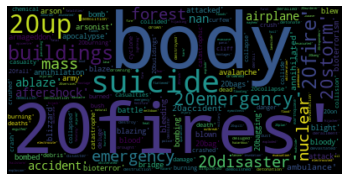

In [11]:
# Start with keyword review:
keyword = str(list(df["keyword"].unique()))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(keyword)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

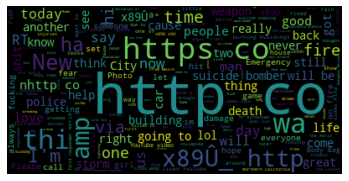

In [12]:
# text review:
text = str(list(df["text"]))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

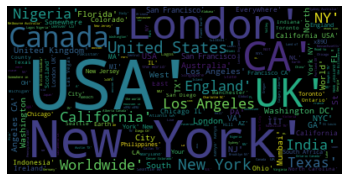

In [169]:
# location review:
locationList = [x for x in list(df["location"]) if str(x) != 'nan']

location = str(locationList)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(location)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#  Data Preprocessing

## Lowercase 

In [14]:
text=list(df["text"])
lc=[]
for i in range(len(text)):
  lc.append(text[i].lower())

In [15]:
df["text"]=lc
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


## Remove punctuation

In [16]:

for i in range(len(text)):
  lc[i]=lc[i].translate(str.maketrans('', '', string.punctuation))

In [19]:
df["text"]=lc
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


## Remove numbers and special characters

In [20]:
for i in range(len(text)):
   lc[i]=re.sub('[^A-Za-z]+', ' ', lc[i])

In [21]:
df["text"]=lc
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


## Tokenization

In [22]:
words=[]*len(text)
for i in range(len(text)):
  words.append(lc[i].split())


In [23]:
df["tokens"]=words
df.head()

,id,keyword,location,text,target,tokens
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,"[just, got, sent, this, photo, from, ruby, ala..."


## Remove stopwords

In [24]:
stop_words =set(stopwords.words('english')) 
unique_words=[]*len(words)
for i in range(len(words)):
  unique_words.append([word for word in words[i] if not word in stop_words])


In [25]:
df["tokens"]=unique_words
df.head()

,id,keyword,location,text,target,tokens
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


## Lemmatization

In [26]:
lemmatized_words=[]*len(unique_words)
lemmatizeur = WordNetLemmatizer()
for i in range(len(unique_words)):
  lemmatized_words.append([lemmatizeur.lemmatize(w) for w in unique_words[i]])

In [27]:
df["tokens"]=lemmatized_words
df.head()

,id,keyword,location,text,target,tokens
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,"[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,"[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


## Stemming

In [28]:
stemmed_lemmatized_words=[]*len(lemmatized_words)
stemmeur=PorterStemmer() 
for i in range(len(unique_words)):
  stemmed_lemmatized_words.append([stemmeur.stem(w) for w in lemmatized_words[i]])

In [29]:
df["tokens"]=stemmed_lemmatized_words

In [30]:
df.head()

,id,keyword,location,text,target,tokens
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,"[deed, reason, earthquak, may, allah, forgiv, u]"
1,4,NaN,NaN,forest fire near la ronge sask canada,1,"[forest, fire, near, la, rong, sask, canada]"
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,"[resid, ask, shelter, place, notifi, offic, ev..."
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1,"[peopl, receiv, wildfir, evacu, order, califor..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,"[got, sent, photo, rubi, alaska, smoke, wildfi..."


### Drop keyword and location columns

In [31]:
df.drop('keyword', axis=1, inplace=True)
df.drop('location', axis=1, inplace=True)

In [32]:
df.head()

,id,text,target,tokens
0,1,our deeds are the reason of this earthquake ma...,1,"[deed, reason, earthquak, may, allah, forgiv, u]"
1,4,forest fire near la ronge sask canada,1,"[forest, fire, near, la, rong, sask, canada]"
2,5,all residents asked to shelter in place are be...,1,"[resid, ask, shelter, place, notifi, offic, ev..."
3,6,people receive wildfires evacuation orders in...,1,"[peopl, receiv, wildfir, evacu, order, califor..."
4,7,just got sent this photo from ruby alaska as s...,1,"[got, sent, photo, rubi, alaska, smoke, wildfi..."


## Save Changements in csv file

In [33]:
df.to_csv(r'Dataset_Disaster.csv', index=False) 

In [34]:
df=pd.read_csv('Dataset_Disaster.csv')

In [35]:
df.head()

,id,text,target,tokens
0,1,our deeds are the reason of this earthquake ma...,1,"['deed', 'reason', 'earthquak', 'may', 'allah'..."
1,4,forest fire near la ronge sask canada,1,"['forest', 'fire', 'near', 'la', 'rong', 'sask..."
2,5,all residents asked to shelter in place are be...,1,"['resid', 'ask', 'shelter', 'place', 'notifi',..."
3,6,people receive wildfires evacuation orders in...,1,"['peopl', 'receiv', 'wildfir', 'evacu', 'order..."
4,7,just got sent this photo from ruby alaska as s...,1,"['got', 'sent', 'photo', 'rubi', 'alaska', 'sm..."
